# AST examples

Examples of processing three particles manually placed into a field.

/Users/ogd22/Library/CloudStorage/OneDrive-ImperialCollegeLondon/07-TBS/ast-model/oap_model/diameters.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


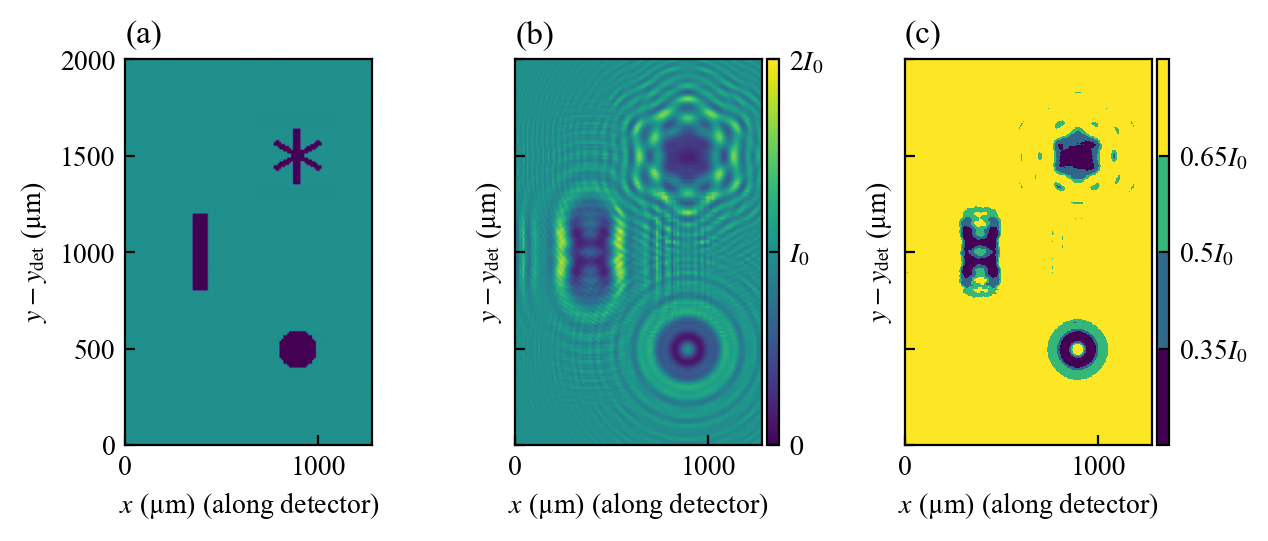

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from oap_model.intensity import AmplitudeField
from oap_model.psd import CrystalModel
from oap_model.intensity import AmplitudeField
from oap_model.psd import PositionedParticle


logging.basicConfig(level=logging.INFO)

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 10
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

save_figures=False

# Initialise the background
total_amplitude_focused = AmplitudeField(np.ones((128, 200), dtype=np.complex128))
total_amplitude_unfocused = AmplitudeField(np.ones((128, 200), dtype=np.complex128))

for i, crystal_model in enumerate([CrystalModel.SPHERE, CrystalModel.RECT_AR5, CrystalModel.ROS_6]):
    # Generate the particle
    generator = crystal_model.get_generator()
    particle = PositionedParticle(200e-6, (0,0), crystal_model,np.array([250e-6*(-1)**(i%2),.5e-3+.5e-3*i,0]))
    ast_model = generator(particle, pixel_size=10e-6)

    # Process the particle at different distances (0 and 3 cm)
    total_amplitude_focused.embed(ast_model.process(0), particle, np.array([0,0,0]))
    total_amplitude_unfocused.embed(ast_model.process(0.03), particle, np.array([0,0,0]))


# Plot the intensities
fig, axs = plt.subplots(1, 3, figsize=(6.5,3.3), sharey=True, sharex=True,)
total_amplitude_focused.intensity.plot(ax=axs[0])
total_amplitude_unfocused.intensity.plot(colorbar=True, ax=axs[1])

# Using grayscale bounds mimicks a 4 bit imager
total_amplitude_unfocused.intensity.plot(grayscale_bounds=[.35, .5, .65], ax=axs[2], colorbar=True)

for i in range(3):
    axs[i].set_title(f"({chr(97+i)})", loc="left")
plt.tight_layout()
if save_figures:
    plt.savefig("img/ast_examples.pdf", bbox_inches="tight")